***
# BootCamp em Ciência de Dados 2 - Alura
Márcio Augusto Silva Gonçalves - marcius72@gmail.com - https://github.com/mago72

***
## Módulo 1 
Analisando dados da saúde com Python e Pandas
- Aprenda como utilizar Python e Pandas para analisar dados reais.
- Aprenda como ler dados reais com Pandas e os desafios de lidar com dados governamentais.
- Analise e explore os dados criando hipótese de forma analítica.
- Crie visualizações e aprenda boas práticas.

***
### Aula 3 - Manipulação de dados
Continuação a partir da mesa base da aula2 - Descer até a célula texto com "INÍCIO DAS AÇÕES DE FATO DA AULA 3"

***
### Análise de gastos hospitalares por mês/ano de INTERNAÇÃO e Unidades da Federação(UF) no Brasil: Datasus de jan/2008 a mar/2021
Com TabNet do DATASUS para baixar .CSV em http://www2.datasus.gov.br/DATASUS/index.php?area=0202&id=11633&VObj=http://tabnet.datasus.gov.br/cgi/deftohtm.exe?sih/cnv/qi

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt


#### Importando base de dados do SUS utilizando pandas

In [2]:
dados_sus = pd.read_csv('C:/Users/mago7/Documents/Cência de Dados/Curso_Alura/BootCamp/Módulo1/datasus_internacao.csv', encoding='ISO-8859-1', skiprows=3, sep=';', skipfooter=12,
                       thousands='.', decimal=',', engine='python')

#### Nova tabela importada com linhas de UF com gastos em R$ e nas colunas mês/ano a partir de 1992

In [3]:
dados_sus.head()

,Unidade da Federação,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,...,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
0,11 Rondônia,-,-,-,-,-,-,-,-,-,...,10479989.36,11433467.56,8876900.39,8167253.19,8759013.71,9003402.23,8414690.60,6039419.59,4732441.04,9.964113e+08
1,12 Acre,-,-,-,-,-,-,-,-,-,...,4053085.41,3658265.59,3470409.45,3267918.69,3393958.27,3711660.71,3005561.16,2272733.90,1137341.65,4.500485e+08
2,13 Amazonas,-,-,-,-,-,-,-,-,-,...,19303743.16,18687233.58,18628627.49,18728251.20,20451573.77,21546059.48,24439059.57,13679358.06,6799060.80,1.917248e+09
3,14 Roraima,-,-,-,-,-,-,-,-,-,...,3192075.41,3262354.34,2978629.22,3313296.78,3527263.23,3125021.90,3209323.68,3044798.77,2381844.31,3.288770e+08
4,15 Pará,-,-,-,-,-,-,-,-,-,...,40496349.97,38793393.54,36965951.76,38406616.21,37043032.10,36914437.92,33887773.65,23343222.94,13069564.31,4.705309e+09


In [4]:
dados_sus.tail()

,Unidade da Federação,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,...,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
22,43 Rio Grande do Sul,-,-,-,-,-,-,-,-,-,...,1.085365e+08,1.117623e+08,1.101079e+08,1.138868e+08,1.167383e+08,1.168340e+08,1.023176e+08,84404640.00,37798832.80,1.276439e+10
23,50 Mato Grosso do Sul,-,-,-,-,-,-,-,-,-,...,2.363994e+07,2.260835e+07,2.151915e+07,2.182500e+07,2.141867e+07,2.138701e+07,1.602779e+07,11428462.42,4035989.77,2.324525e+09
24,51 Mato Grosso,-,-,-,-,-,-,-,-,-,...,2.068157e+07,2.093614e+07,2.017620e+07,2.038794e+07,1.831662e+07,1.885285e+07,1.589053e+07,13207979.82,8835890.09,2.180120e+09
25,52 Goiás,-,-,-,-,-,-,-,-,-,...,4.587133e+07,4.756816e+07,4.795133e+07,4.530484e+07,3.978541e+07,3.761425e+07,3.565589e+07,32253788.65,24867001.02,4.973572e+09
26,53 Distrito Federal,-,-,-,-,-,-,-,-,-,...,2.642848e+07,2.387530e+07,2.177187e+07,2.308759e+07,2.066853e+07,2.255203e+07,2.257387e+07,19004029.87,14731938.43,2.592423e+09


In [5]:
dados_sus.mean()

2007/Ago    3.049528e+05
2007/Set    7.881453e+05
2007/Out    2.440163e+06
2007/Nov    5.517354e+06
2007/Dez    1.233716e+07
                ...     
2020/Dez    5.377291e+07
2021/Jan    4.947411e+07
2021/Fev    3.899242e+07
2021/Mar    2.416371e+07
Total       6.388206e+09
Length: 165, dtype: float64

#### Abaixo informação da tabela com identificação de 165 colunas tipo float (valores numéricos decimais) e 123 tipo Object (não numéricos). Na sequencia comando para identificar as colunas object.

In [6]:
dados_sus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Columns: 287 entries, Unidade da Federação to Total
dtypes: float64(165), object(122)
memory usage: 60.7+ KB


In [7]:
dados_sus.select_dtypes(include=object)

,Unidade da Federação,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,...,2006/Out,2006/Nov,2006/Dez,2007/Jan,2007/Fev,2007/Mar,2007/Abr,2007/Mai,2007/Jun,2007/Jul
0,11 Rondônia,-,-,-,-,-,-,-,-,-,...,-,-,-,-,604.33,-,-,-,-,-
1,12 Acre,-,-,-,-,-,-,-,-,-,...,-,-,-,184.65,-,-,-,-,1099.17,-
2,13 Amazonas,-,-,-,-,-,-,-,-,-,...,-,-,-,1134.83,951.89,-,531.94,-,-,212.75
3,14 Roraima,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,413.69,-
4,15 Pará,-,-,-,-,-,-,-,-,-,...,-,-,-,4994.86,2182.97,-,-,210.20,399.57,9487.90
5,16 Amapá,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,1647.39,7754.72,12695.61
6,17 Tocantins,-,-,-,-,-,-,-,-,-,...,-,-,1122.46,-,578.69,-,-,-,34446.08,586.69
7,21 Maranhão,-,-,-,-,-,-,-,-,-,...,-,-,-,2767.08,2871.13,-,295.36,7090.58,-,42360.79
8,22 Piauí,-,-,-,-,-,-,-,-,-,...,-,-,-,-,162.01,-,-,428.77,-,12172.72
9,23 Ceará,-,-,-,-,-,-,-,-,-,...,-,-,-,149.65,3186.33,-,-,-,-,3698.69


#### Função format para ajuste de notação científica para valores decimais

In [8]:
pd.options.display.float_format='{:.2f}'.format

In [9]:
dados_sus.mean()

2007/Ago       304952.77
2007/Set       788145.26
2007/Out      2440162.96
2007/Nov      5517354.05
2007/Dez     12337159.42
                ...     
2020/Dez     53772909.13
2021/Jan     49474107.60
2021/Fev     38992424.23
2021/Mar     24163712.88
Total      6388205992.19
Length: 165, dtype: float64

#### Avaliando o mês de agosto de 2008

In [10]:
dados_sus['2008/Ago']

0      2938286.29
1      1886871.84
2      8331763.97
3      1045291.11
4     23259148.28
5      1550340.63
6      5213290.38
7     14609872.57
8     10645917.52
9     29304821.51
10    10812840.19
11    12673774.35
12    31705296.79
13     9262767.68
14     4543252.50
15    43254543.33
16    80374117.08
17    12384068.19
18    42500830.29
19   180005050.15
20    56699001.13
21    28887854.62
22    56233758.74
23     9602843.49
24     8987811.95
25    21054991.27
26    11548451.89
Name: 2008/Ago, dtype: float64

In [11]:
dados_sus['2008/Ago'].mean()

26641365.101481482

#### Visualizações preliminares
Geração, testes e ajustes de gráficos para o mês agosto de 2008 com plot, pyplot e ticker

<AxesSubplot:xlabel='Unidade da Federação'>

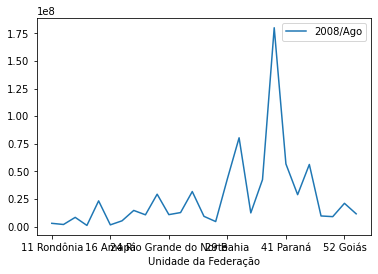

In [12]:
dados_sus.plot(x='Unidade da Federação', y='2008/Ago')

<AxesSubplot:xlabel='Unidade da Federação'>

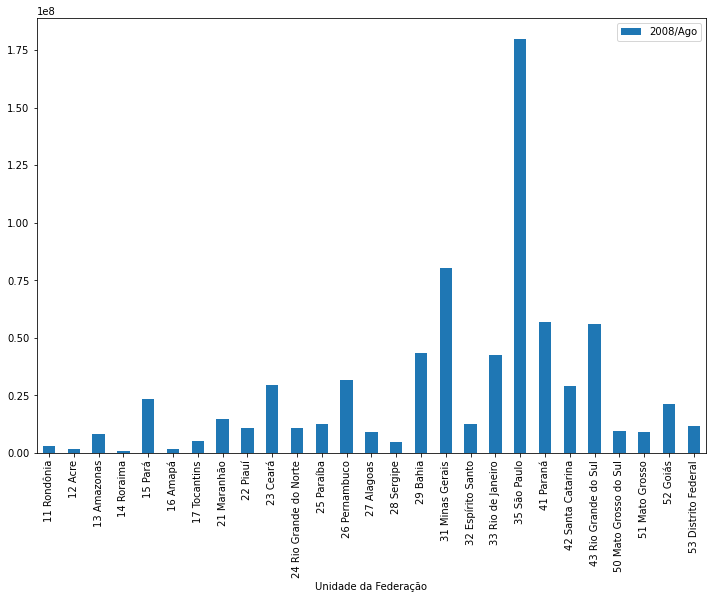

In [13]:
dados_sus.plot(x='Unidade da Federação', y='2008/Ago', kind='bar', figsize=(12,8))

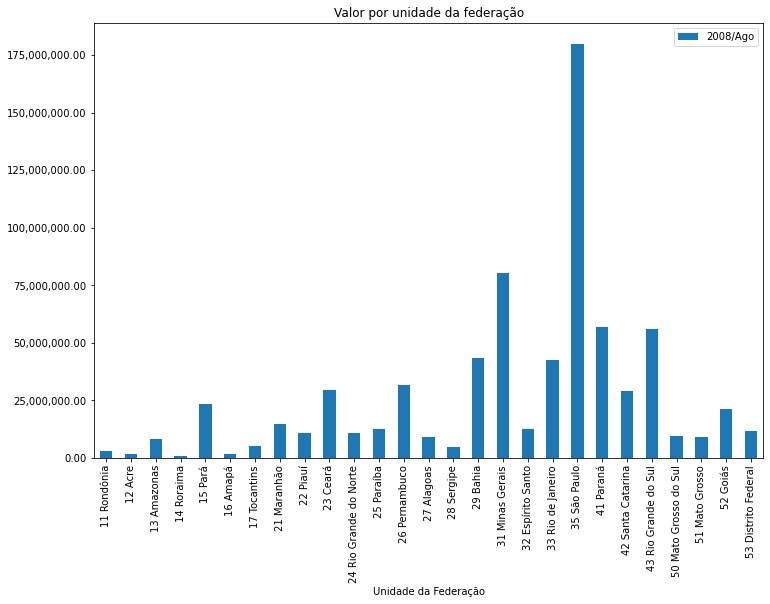

In [14]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
ax = dados_sus.plot(x='Unidade da Federação', y='2008/Ago', kind='bar', figsize=(12,8))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
plt.title('Valor por unidade da federação')
plt.show()

### Gráfico ajustado abaixo.

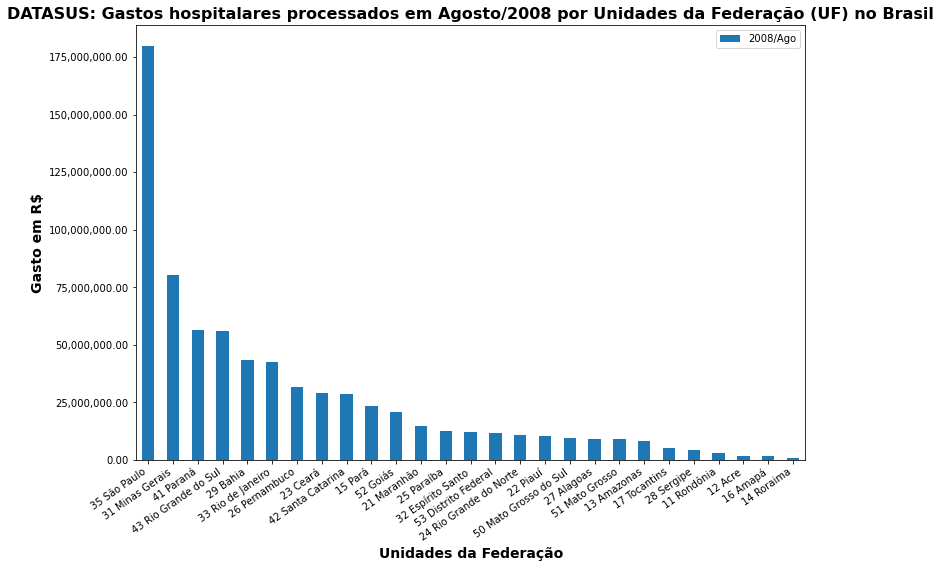

In [15]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

ax = dados_sus.sort_values(by='2008/Ago', ascending=False).plot(x='Unidade da Federação', y='2008/Ago', kind='bar', figsize=(12,8))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
ax.set_xlabel('Unidades da Federação', fontsize=14, weight=(700))
ax.set_ylabel('Gasto em R$', fontsize=14, weight=(700))

plt.xticks(rotation=35, ha='right')
plt.title('DATASUS: Gastos hospitalares processados em Agosto/2008 por Unidades da Federação (UF) no Brasil', weight=(700), fontsize=16)
plt.show()

Foram ajustados nomes e negrito do título e rótulo dos eixos, além da posição do rótulo do eixo x e ordem decrescente de gastos por UF

### Outro gráfico para o mês mais recente do dataframe

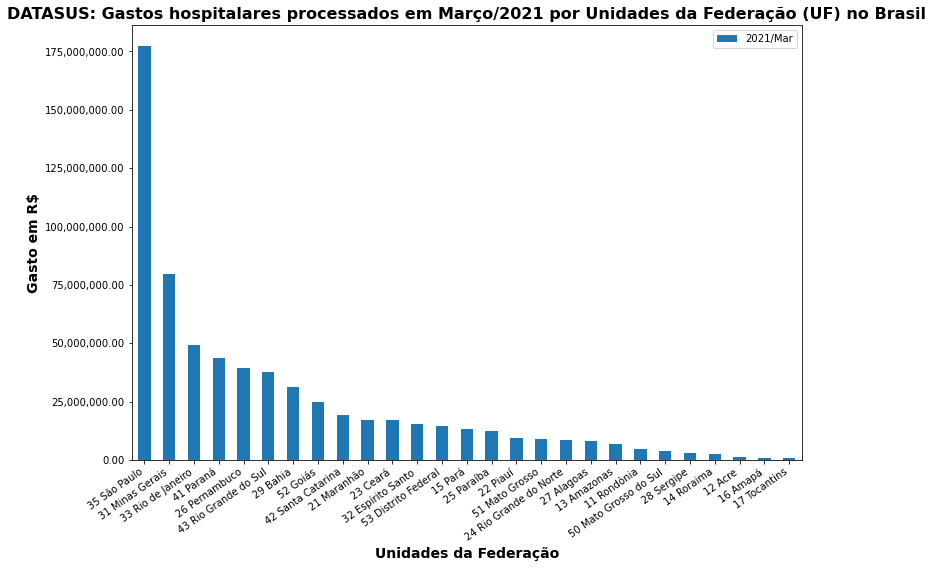

In [16]:
ax = dados_sus.sort_values(by='2021/Mar', ascending=False).plot(x='Unidade da Federação', y='2021/Mar', kind='bar', figsize=(12,8))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
ax.set_xlabel('Unidades da Federação', fontsize=14, weight=(700))
ax.set_ylabel('Gasto em R$', fontsize=14, weight=(700))

plt.xticks(rotation=35, ha='right')
plt.title('DATASUS: Gastos hospitalares processados em Março/2021 por Unidades da Federação (UF) no Brasil', weight=(700), fontsize=16)
plt.show()

Para melhorias: 1) pode-se tirar os IDs das UFs; 2) colocar o label do eixo y já em milhões, evitando número muito grande; 3) ajustar as casas decimais da média datasus ago/2008

***
#### Para selecionar duas colunas no novo dataframe

In [17]:
dados_sus[["2008/Ago", "2008/Set"]].head()

,2008/Ago,2008/Set
0,2938286.29,2843930.91
1,1886871.84,2084884.80
2,8331763.97,8148089.92
3,1045291.11,1003740.89
4,23259148.28,23667690.01


#### Usando o mean novamente para verificar as colunas com float
veja que valores float válidos começa em jan/2007 indicando as colunas válidas com preenchimento completo e o dataframe começa em 1992 com vários preenchimentos vazios

In [18]:
dados_sus.mean()

2007/Ago       304952.77
2007/Set       788145.26
2007/Out      2440162.96
2007/Nov      5517354.05
2007/Dez     12337159.42
                ...     
2020/Dez     53772909.13
2021/Jan     49474107.60
2021/Fev     38992424.23
2021/Mar     24163712.88
Total      6388205992.19
Length: 165, dtype: float64

#### Determinando o índice e fazendo um slice no dataframe para colunas válidas

In [19]:
colunas_validas=dados_sus.mean().index
colunas_validas

Index(['2007/Ago', '2007/Set', '2007/Out', '2007/Nov', '2007/Dez', '2008/Jan',
       '2008/Fev', '2008/Mar', '2008/Abr', '2008/Mai',
       ...
       '2020/Jul', '2020/Ago', '2020/Set', '2020/Out', '2020/Nov', '2020/Dez',
       '2021/Jan', '2021/Fev', '2021/Mar', 'Total'],
      dtype='object', length=165)

In [20]:
dados_sus[colunas_validas]

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,...,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
0,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,...,10479989.36,11433467.56,8876900.39,8167253.19,8759013.71,9003402.23,8414690.60,6039419.59,4732441.04,996411254.68
1,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,...,4053085.41,3658265.59,3470409.45,3267918.69,3393958.27,3711660.71,3005561.16,2272733.90,1137341.65,450048530.47
2,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,...,19303743.16,18687233.58,18628627.49,18728251.20,20451573.77,21546059.48,24439059.57,13679358.06,6799060.80,1917247936.05
3,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,...,3192075.41,3262354.34,2978629.22,3313296.78,3527263.23,3125021.90,3209323.68,3044798.77,2381844.31,328876965.09
4,181159.29,433414.74,1893197.50,5105406.44,13162823.43,21762104.16,20126081.01,22149375.82,23436682.75,23861080.80,...,40496349.97,38793393.54,36965951.76,38406616.21,37043032.10,36914437.92,33887773.65,23343222.94,13069564.31,4705309002.29
5,33672.74,104822.98,118378.28,226661.18,844019.90,1329876.61,1275063.72,1177745.93,1396371.51,1411520.77,...,2536642.73,2702550.32,2533445.46,2762003.36,2714710.93,2826612.42,2513766.36,1534733.18,989155.40,309860092.59
6,4113.76,76633.06,343702.61,1068685.94,3022200.87,5136474.61,5051932.07,5200151.87,5343714.73,5344487.99,...,7934629.02,6488927.84,4229376.60,1853045.23,509009.74,689383.43,347626.85,416534.32,928756.84,1020028272.64
7,385330.18,1018352.93,2277717.78,4334468.23,8832514.85,21551600.33,13452263.93,14750895.33,15148647.11,14543679.92,...,33991348.70,32711259.43,31985709.32,34430463.50,32446802.41,30927070.93,26797697.76,23260245.95,17294509.11,3871069498.04
8,220788.25,353468.67,1078182.68,2406035.32,4929772.93,11375419.37,9711680.20,10428191.09,10227943.00,10562148.66,...,25817440.95,22452255.50,20636997.20,20326808.24,20021998.76,19352220.14,18437275.64,13636005.36,9542151.53,2280888802.74
9,357904.65,572356.18,1865065.71,5131814.39,10798042.86,32444328.54,27643304.86,30085370.22,31376221.00,31189904.62,...,58448488.85,55118185.83,53827491.88,54679652.99,54026288.42,50271552.33,43743425.74,30186951.00,17173151.55,6591836650.18


#### Inserindo a coluna Unidades da Federação dentro do DF de Colunas válidas

In [21]:
colunas_validas = dados_sus.mean().index.tolist()   #transformando o índice em lista para poder manipular
colunas_validas.insert(0, "Unidade da Federação") # 0 é a posição onde entra a coluna unidade da federação do DataFrame original
colunas_validas

['Unidade da Federação',
 '2007/Ago',
 '2007/Set',
 '2007/Out',
 '2007/Nov',
 '2007/Dez',
 '2008/Jan',
 '2008/Fev',
 '2008/Mar',
 '2008/Abr',
 '2008/Mai',
 '2008/Jun',
 '2008/Jul',
 '2008/Ago',
 '2008/Set',
 '2008/Out',
 '2008/Nov',
 '2008/Dez',
 '2009/Jan',
 '2009/Fev',
 '2009/Mar',
 '2009/Abr',
 '2009/Mai',
 '2009/Jun',
 '2009/Jul',
 '2009/Ago',
 '2009/Set',
 '2009/Out',
 '2009/Nov',
 '2009/Dez',
 '2010/Jan',
 '2010/Fev',
 '2010/Mar',
 '2010/Abr',
 '2010/Mai',
 '2010/Jun',
 '2010/Jul',
 '2010/Ago',
 '2010/Set',
 '2010/Out',
 '2010/Nov',
 '2010/Dez',
 '2011/Jan',
 '2011/Fev',
 '2011/Mar',
 '2011/Abr',
 '2011/Mai',
 '2011/Jun',
 '2011/Jul',
 '2011/Ago',
 '2011/Set',
 '2011/Out',
 '2011/Nov',
 '2011/Dez',
 '2012/Jan',
 '2012/Fev',
 '2012/Mar',
 '2012/Abr',
 '2012/Mai',
 '2012/Jun',
 '2012/Jul',
 '2012/Ago',
 '2012/Set',
 '2012/Out',
 '2012/Nov',
 '2012/Dez',
 '2013/Jan',
 '2013/Fev',
 '2013/Mar',
 '2013/Abr',
 '2013/Mai',
 '2013/Jun',
 '2013/Jul',
 '2013/Ago',
 '2013/Set',
 '2013/Out',


In [22]:
validas = dados_sus[colunas_validas]
validas.head()

,Unidade da Federação,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,...,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
0,11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,...,10479989.36,11433467.56,8876900.39,8167253.19,8759013.71,9003402.23,8414690.60,6039419.59,4732441.04,996411254.68
1,12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,...,4053085.41,3658265.59,3470409.45,3267918.69,3393958.27,3711660.71,3005561.16,2272733.90,1137341.65,450048530.47
2,13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,...,19303743.16,18687233.58,18628627.49,18728251.20,20451573.77,21546059.48,24439059.57,13679358.06,6799060.80,1917247936.05
3,14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,...,3192075.41,3262354.34,2978629.22,3313296.78,3527263.23,3125021.90,3209323.68,3044798.77,2381844.31,328876965.09
4,15 Pará,181159.29,433414.74,1893197.50,5105406.44,13162823.43,21762104.16,20126081.01,22149375.82,23436682.75,...,40496349.97,38793393.54,36965951.76,38406616.21,37043032.10,36914437.92,33887773.65,23343222.94,13069564.31,4705309002.29


Aqui ficou demonstrado a inserção e que o índice do DF são os números 0 1 2 ... (no lado esquerdo dos estados) ao invés de Unidades da Federação.
***
Assim, pode-se setar o índice devido conforme abaixo:

In [23]:
validas = validas.set_index("Unidade da Federação")
validas

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,...,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,...,10479989.36,11433467.56,8876900.39,8167253.19,8759013.71,9003402.23,8414690.60,6039419.59,4732441.04,996411254.68
12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,...,4053085.41,3658265.59,3470409.45,3267918.69,3393958.27,3711660.71,3005561.16,2272733.90,1137341.65,450048530.47
13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,...,19303743.16,18687233.58,18628627.49,18728251.20,20451573.77,21546059.48,24439059.57,13679358.06,6799060.80,1917247936.05
14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,...,3192075.41,3262354.34,2978629.22,3313296.78,3527263.23,3125021.90,3209323.68,3044798.77,2381844.31,328876965.09
15 Pará,181159.29,433414.74,1893197.50,5105406.44,13162823.43,21762104.16,20126081.01,22149375.82,23436682.75,23861080.80,...,40496349.97,38793393.54,36965951.76,38406616.21,37043032.10,36914437.92,33887773.65,23343222.94,13069564.31,4705309002.29
16 Amapá,33672.74,104822.98,118378.28,226661.18,844019.90,1329876.61,1275063.72,1177745.93,1396371.51,1411520.77,...,2536642.73,2702550.32,2533445.46,2762003.36,2714710.93,2826612.42,2513766.36,1534733.18,989155.40,309860092.59
17 Tocantins,4113.76,76633.06,343702.61,1068685.94,3022200.87,5136474.61,5051932.07,5200151.87,5343714.73,5344487.99,...,7934629.02,6488927.84,4229376.60,1853045.23,509009.74,689383.43,347626.85,416534.32,928756.84,1020028272.64
21 Maranhão,385330.18,1018352.93,2277717.78,4334468.23,8832514.85,21551600.33,13452263.93,14750895.33,15148647.11,14543679.92,...,33991348.70,32711259.43,31985709.32,34430463.50,32446802.41,30927070.93,26797697.76,23260245.95,17294509.11,3871069498.04
22 Piauí,220788.25,353468.67,1078182.68,2406035.32,4929772.93,11375419.37,9711680.20,10428191.09,10227943.00,10562148.66,...,25817440.95,22452255.50,20636997.20,20326808.24,20021998.76,19352220.14,18437275.64,13636005.36,9542151.53,2280888802.74


In [24]:
validas['2020/Ago'].head()   # resultado da coluna selecionada por UF

Unidade da Federação
11 Rondônia   11433467.56
12 Acre        3658265.59
13 Amazonas   18687233.58
14 Roraima     3262354.34
15 Pará       38793393.54
Name: 2020/Ago, dtype: float64

In [25]:
validas.loc["12 Acre"]   # Resultado da linha selecionada e os valores por data

2007/Ago       10470.07
2007/Set       14001.71
2007/Out       86200.85
2007/Nov      301323.68
2007/Dez      769612.36
               ...     
2020/Dez     3711660.71
2021/Jan     3005561.16
2021/Fev     2272733.90
2021/Mar     1137341.65
Total      450048530.47
Name: 12 Acre, Length: 165, dtype: float64

***
#### Visualização gráfica

<AxesSubplot:xlabel='Unidade da Federação'>

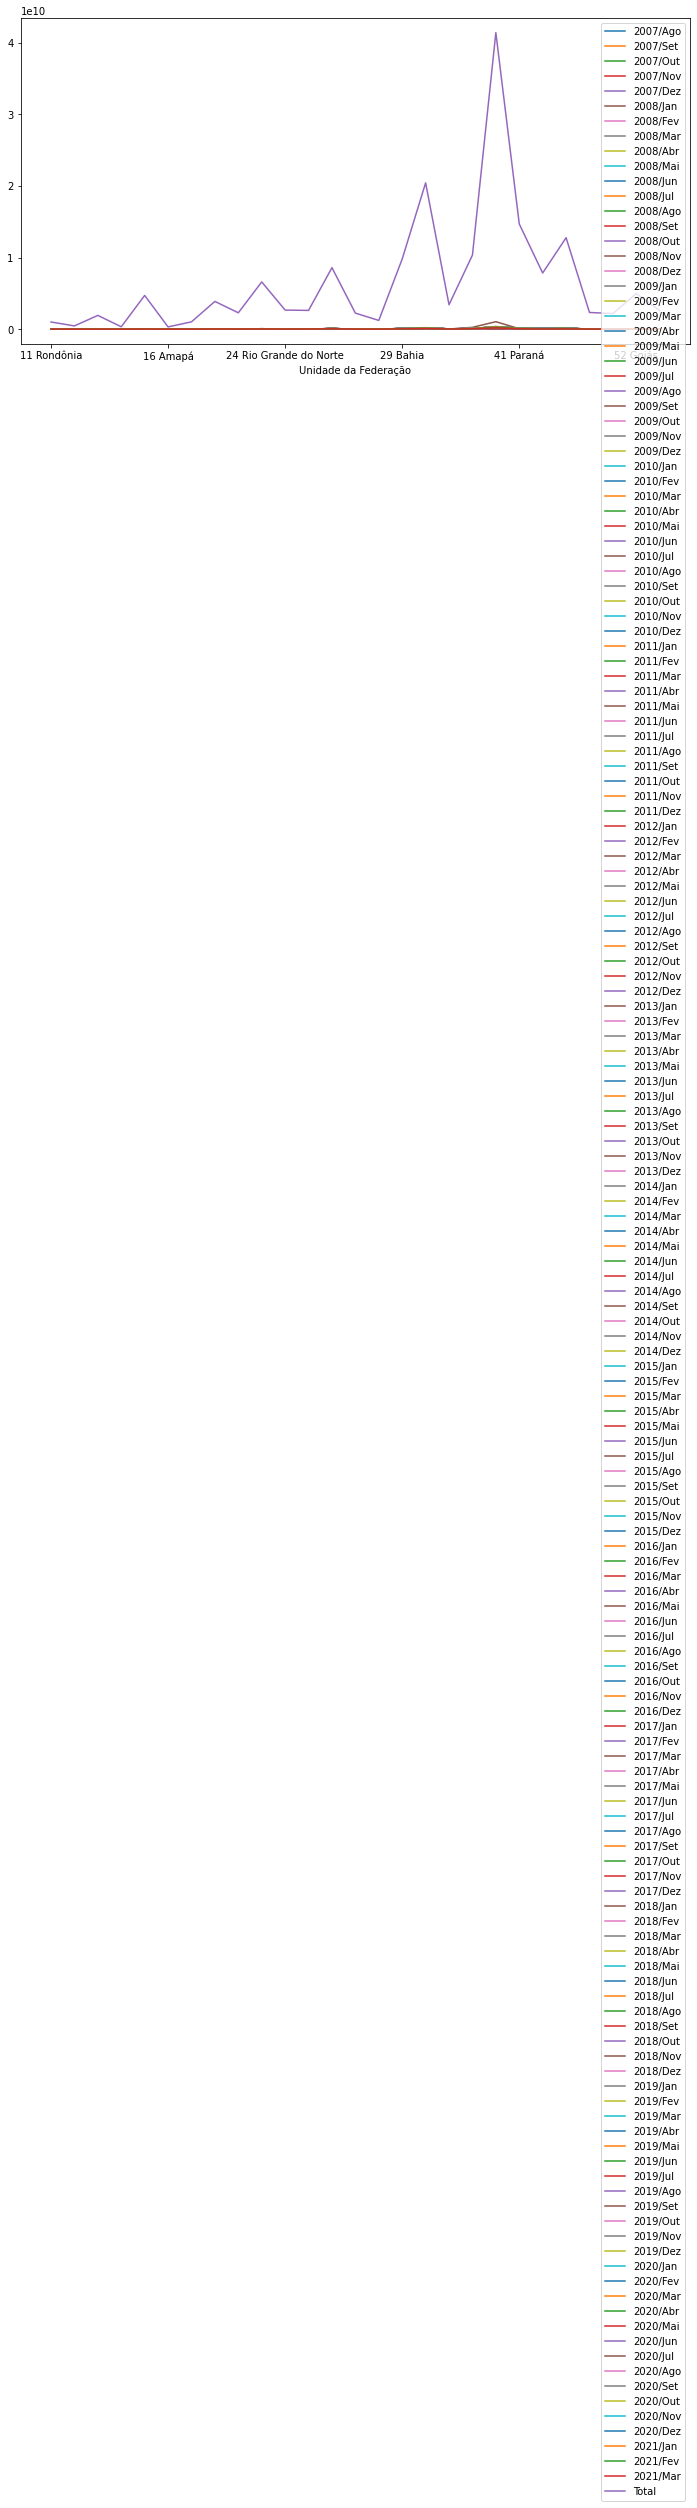

In [26]:
validas.plot(figsize=(12,6))    # Aqui o gráfico fica linhas x datas o que é errado pois deseja-se por UF

#### Aqui vamos transpor o índice, transformando UF para ocupar o DF como colunas e então poder imprimir o gráfico corretamente:

In [27]:
validas.T.head()   # Função T para transpor o índice para as colunas e poder imprimir o gráfico corretamente

Unidade da Federação,11 Rondônia,12 Acre,13 Amazonas,14 Roraima,15 Pará,16 Amapá,17 Tocantins,21 Maranhão,22 Piauí,23 Ceará,...,32 Espírito Santo,33 Rio de Janeiro,35 São Paulo,41 Paraná,42 Santa Catarina,43 Rio Grande do Sul,50 Mato Grosso do Sul,51 Mato Grosso,52 Goiás,53 Distrito Federal
2007/Ago,4209.37,10470.07,35752.72,4785.91,181159.29,33672.74,4113.76,385330.18,220788.25,357904.65,...,57408.11,469469.34,1665349.90,554800.22,693955.05,1049252.33,199556.12,63562.50,179395.82,191951.47
2007/Set,16397.03,14001.71,45570.64,11858.63,433414.74,104822.98,76633.06,1018352.93,353468.67,572356.18,...,284224.80,921646.57,4434168.64,1431708.01,1092964.12,3182913.14,573675.41,232444.62,418053.58,769966.25
2007/Out,133645.19,86200.85,416012.30,43852.67,1893197.50,118378.28,343702.61,2277717.78,1078182.68,1865065.71,...,1152115.25,2994664.57,14577395.84,4630402.44,3562300.82,8571312.11,1069816.66,927219.59,1198730.25,2165619.56
2007/Nov,346912.84,301323.68,2020381.79,369328.51,5105406.44,226661.18,1068685.94,4334468.23,2406035.32,5131814.39,...,2296383.23,7250528.08,35032259.98,11120030.79,7578502.38,16592432.80,1995899.52,1740439.60,2712117.54,3813256.48
2007/Dez,711758.31,769612.36,5949408.99,470676.43,13162823.43,844019.90,3022200.87,8832514.85,4929772.93,10798042.86,...,5724199.54,13627123.27,76668547.41,28790722.87,14772555.10,30134255.70,4277979.14,5394225.43,9293914.78,7121965.42


<AxesSubplot:>

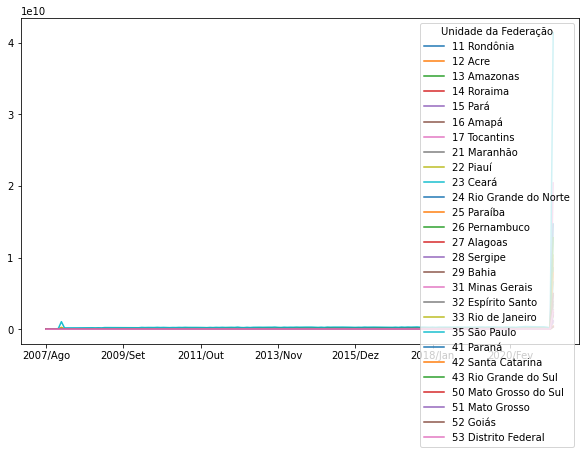

In [28]:
validas.T.plot(figsize=(10,6))

#### O gráfico ficou correto por UF, porém o último valor (por trás da legenda) mostra um resultado grande no final 

In [29]:
validas.T.tail()    # Investigando o final do DF de validas transposto revela a coluna 'Total' distorcendo o gráfico

Unidade da Federação,11 Rondônia,12 Acre,13 Amazonas,14 Roraima,15 Pará,16 Amapá,17 Tocantins,21 Maranhão,22 Piauí,23 Ceará,...,32 Espírito Santo,33 Rio de Janeiro,35 São Paulo,41 Paraná,42 Santa Catarina,43 Rio Grande do Sul,50 Mato Grosso do Sul,51 Mato Grosso,52 Goiás,53 Distrito Federal
2020/Dez,9003402.23,3711660.71,21546059.48,3125021.90,36914437.92,2826612.42,689383.43,30927070.93,19352220.14,50271552.33,...,40500910.57,90567351.87,326846228.95,122146256.92,72720675.11,116833971.73,21387005.58,18852854.81,37614253.55,22552034.04
2021/Jan,8414690.60,3005561.16,24439059.57,3209323.68,33887773.65,2513766.36,347626.85,26797697.76,18437275.64,43743425.74,...,33767261.13,87201907.99,324115425.70,106948897.53,57281832.19,102317646.36,16027788.65,15890528.31,35655886.73,22573869.50
2021/Fev,6039419.59,2272733.90,13679358.06,3044798.77,23343222.94,1534733.18,416534.32,23260245.95,13636005.36,30186951.00,...,25669612.63,60873103.08,268193064.06,83130175.37,47429335.91,84404640.00,11428462.42,13207979.82,32253788.65,19004029.87
2021/Mar,4732441.04,1137341.65,6799060.80,2381844.31,13069564.31,989155.40,928756.84,17294509.11,9542151.53,17173151.55,...,15606368.11,49149884.48,177408317.71,43480729.07,19375822.56,37798832.80,4035989.77,8835890.09,24867001.02,14731938.43
Total,996411254.68,450048530.47,1917247936.05,328876965.09,4705309002.29,309860092.59,1020028272.64,3871069498.04,2280888802.74,6591836650.18,...,3405850698.58,10337389922.09,41396408548.81,14681514706.67,7835011163.40,12764391179.92,2324525096.33,2180119781.15,4973572261.43,2592422853.56


#### Retirando a coluna Total da base validas, verificando e grando novamente o gráfico:

In [30]:
validas = validas.drop("Total", axis=1)    ## A função drop retira a linha Total e o axis=1 indica que o total está como Linha (axis=0 indicaria como coluna, se fosse o caso) 
validas.head()

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,...,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,...,10993332.84,10479989.36,11433467.56,8876900.39,8167253.19,8759013.71,9003402.23,8414690.60,6039419.59,4732441.04
12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,...,3914823.86,4053085.41,3658265.59,3470409.45,3267918.69,3393958.27,3711660.71,3005561.16,2272733.90,1137341.65
13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,...,18433057.47,19303743.16,18687233.58,18628627.49,18728251.20,20451573.77,21546059.48,24439059.57,13679358.06,6799060.80
14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,...,3300012.98,3192075.41,3262354.34,2978629.22,3313296.78,3527263.23,3125021.90,3209323.68,3044798.77,2381844.31
15 Pará,181159.29,433414.74,1893197.50,5105406.44,13162823.43,21762104.16,20126081.01,22149375.82,23436682.75,23861080.80,...,40994545.21,40496349.97,38793393.54,36965951.76,38406616.21,37043032.10,36914437.92,33887773.65,23343222.94,13069564.31


In [31]:
validas.T.tail()

Unidade da Federação,11 Rondônia,12 Acre,13 Amazonas,14 Roraima,15 Pará,16 Amapá,17 Tocantins,21 Maranhão,22 Piauí,23 Ceará,...,32 Espírito Santo,33 Rio de Janeiro,35 São Paulo,41 Paraná,42 Santa Catarina,43 Rio Grande do Sul,50 Mato Grosso do Sul,51 Mato Grosso,52 Goiás,53 Distrito Federal
2020/Nov,8759013.71,3393958.27,20451573.77,3527263.23,37043032.10,2714710.93,509009.74,32446802.41,20021998.76,54026288.42,...,35708727.33,82807309.85,324599773.40,133443307.36,79448753.69,116738266.69,21418665.16,18316623.02,39785408.90,20668526.36
2020/Dez,9003402.23,3711660.71,21546059.48,3125021.90,36914437.92,2826612.42,689383.43,30927070.93,19352220.14,50271552.33,...,40500910.57,90567351.87,326846228.95,122146256.92,72720675.11,116833971.73,21387005.58,18852854.81,37614253.55,22552034.04
2021/Jan,8414690.60,3005561.16,24439059.57,3209323.68,33887773.65,2513766.36,347626.85,26797697.76,18437275.64,43743425.74,...,33767261.13,87201907.99,324115425.70,106948897.53,57281832.19,102317646.36,16027788.65,15890528.31,35655886.73,22573869.50
2021/Fev,6039419.59,2272733.90,13679358.06,3044798.77,23343222.94,1534733.18,416534.32,23260245.95,13636005.36,30186951.00,...,25669612.63,60873103.08,268193064.06,83130175.37,47429335.91,84404640.00,11428462.42,13207979.82,32253788.65,19004029.87
2021/Mar,4732441.04,1137341.65,6799060.80,2381844.31,13069564.31,989155.40,928756.84,17294509.11,9542151.53,17173151.55,...,15606368.11,49149884.48,177408317.71,43480729.07,19375822.56,37798832.80,4035989.77,8835890.09,24867001.02,14731938.43


<AxesSubplot:>

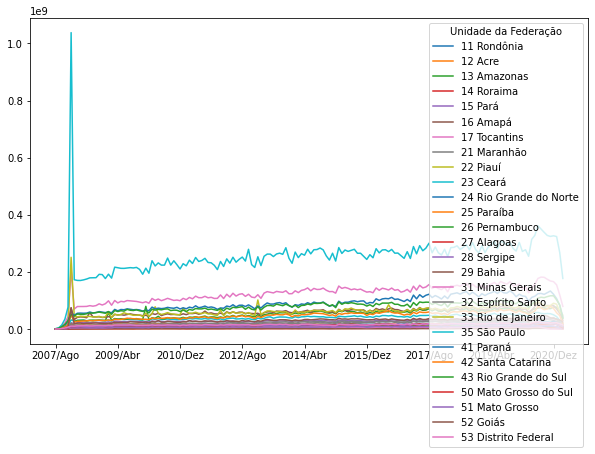

In [32]:
validas.T.plot(figsize=(10,6))

O gráfico ficou ajustado e já indica algo a investigar, posteriormente, nas linhas que sobem muito logo no início do plot dos dados por UF e a legenda mal posicionada (desafio)

***
## DESAFIOS 
MÓDULO 1 - AULA 2

***
### Desafio 1 - Aula 2: reposicionar a legenda. Dentro? Fora? Onde?

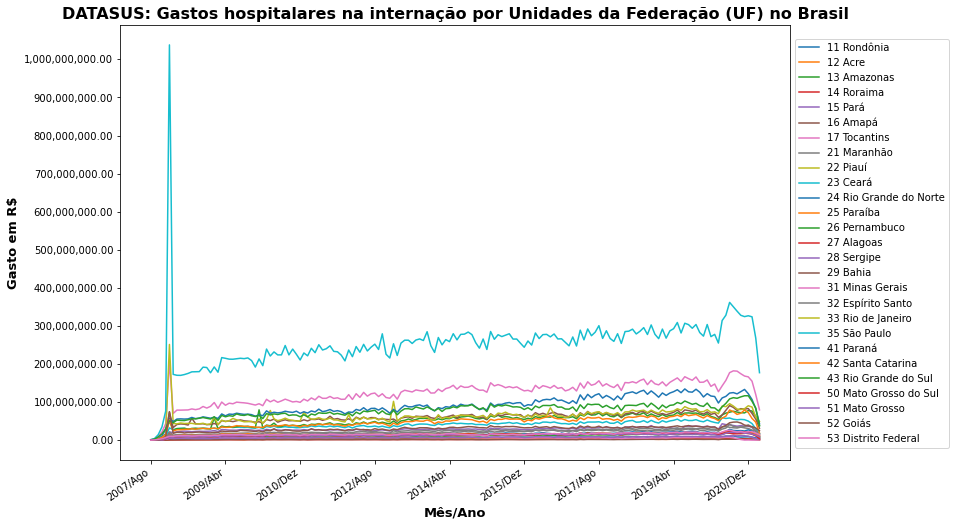

In [33]:
ax = validas.T.plot(figsize=(12,8))
plt.legend(bbox_to_anchor=(1,0.98))
plt.style.use('ggplot')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
ax.set_xlabel('Mês/Ano', fontsize=13, weight=(700))
ax.set_ylabel('Gasto em R$', fontsize=13, weight=(700))
plt.xticks(rotation=35, ha='right')
plt.locator_params(axis='y', nbins=12)
plt.title('DATASUS: Gastos hospitalares na internação por Unidades da Federação (UF) no Brasil', weight=(700), fontsize=16)
plt.show()

***
### Desafio 2 - Aula 2: Plotar o gráfico de linha com apenas 5 estados de sua preferência

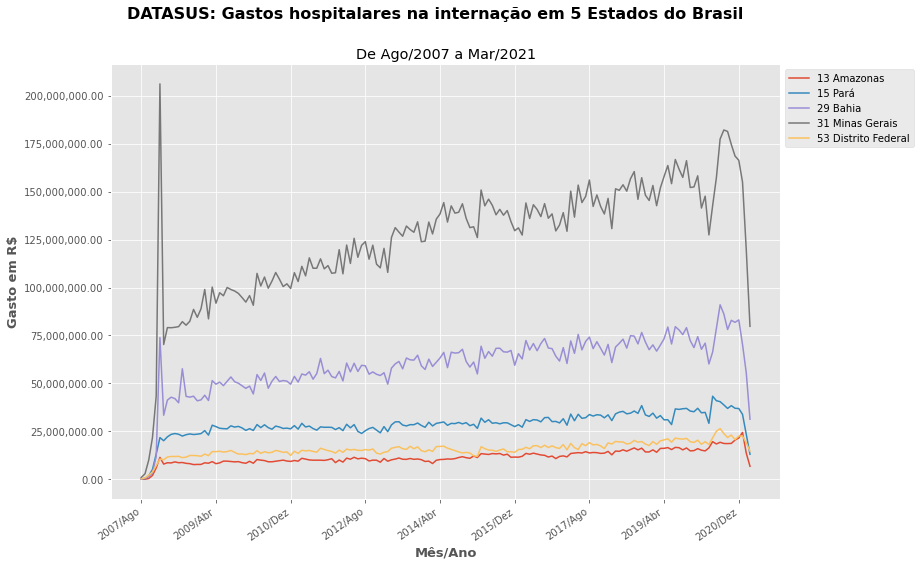

In [34]:
ax = validas.loc[['13 Amazonas', '15 Pará', '29 Bahia', '31 Minas Gerais', '53 Distrito Federal']].T.plot(figsize=(12,8))
plt.legend(bbox_to_anchor=(1,1))
plt.style.use('ggplot')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
ax.set_xlabel('Mês/Ano', fontsize=13, weight=(700))
ax.set_ylabel('Gasto em R$', fontsize=13, weight=(700))
plt.xticks(rotation=35, ha='right')
plt.locator_params(axis='y', nbins=11)
plt.suptitle('DATASUS: Gastos hospitalares na internação em 5 Estados do Brasil', weight=(700), fontsize=16)
plt.title('De Ago/2007 a Mar/2021')
plt.show()

***
#### AULA3 - INÍCIO DAS AÇÕES 

- Vimos que nos gráficos acima a paleta de coreso início stá muito alto e deve ser investigado
- Ainda que a paleta de cores do matplotlib se repete e não permite a visualização adequada. Um desafio é melhorar a palte de cores com o matplotlib. Posterioemente será usado a biblioteca SEABORN
***

### Desafio 01 - Alula 3: Escolher uma paleta de cores mais adequada do matplotlib.
Vamos começar ajustando as cores do gráfico de gastos hospitalares de todas as 27 UFs

- importar colormap(cm) em matplotlib
- mapa de cores: Paired
- Quantidade de cores: tamando (len) do arranjo do DF validas

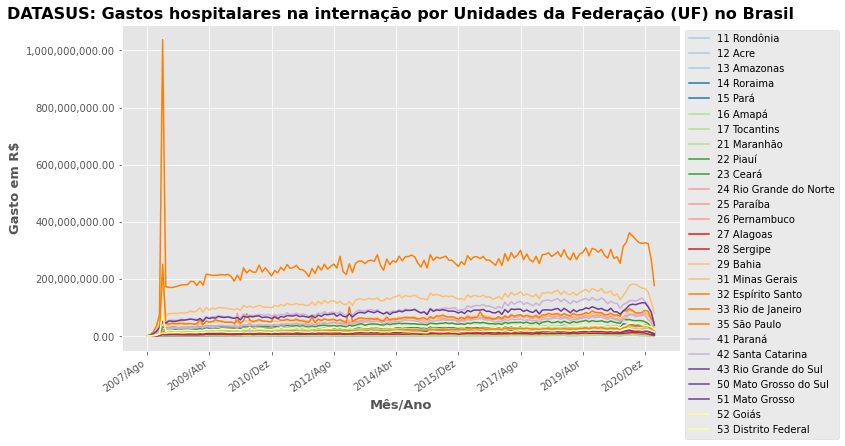

In [35]:
import matplotlib.cm as cm

cores = len(validas)
tipo_cores = plt.cm.Paired(np.linspace(0, 0.9, cores))

ax = validas.T.plot(figsize=(10,6), color=tipo_cores)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
ax.set_xlabel('Mês/Ano', fontsize=13, weight=(700))
ax.set_ylabel('Gasto em R$', fontsize=13, weight=(700))

plt.style.use('ggplot') # aqui mesmo mudando o estilo, para que o plt herda o estilo já setado em gráfico anterior neste notebook
plt.legend(bbox_to_anchor=(1,1))
plt.xticks(rotation=35, ha='right')
plt.locator_params(axis='y', nbins=11)
plt.title('DATASUS: Gastos hospitalares na internação por Unidades da Federação (UF) no Brasil', weight=(700), fontsize=16)
plt.show()

***

#### Veremos agora novas formas de selecionar os 5 Estados do gráfico do 2º desafio da aula2, mais acima, de acordo com critérios definidos

In [36]:
validas.T.head() # 5 primeiros

Unidade da Federação,11 Rondônia,12 Acre,13 Amazonas,14 Roraima,15 Pará,16 Amapá,17 Tocantins,21 Maranhão,22 Piauí,23 Ceará,...,32 Espírito Santo,33 Rio de Janeiro,35 São Paulo,41 Paraná,42 Santa Catarina,43 Rio Grande do Sul,50 Mato Grosso do Sul,51 Mato Grosso,52 Goiás,53 Distrito Federal
2007/Ago,4209.37,10470.07,35752.72,4785.91,181159.29,33672.74,4113.76,385330.18,220788.25,357904.65,...,57408.11,469469.34,1665349.90,554800.22,693955.05,1049252.33,199556.12,63562.50,179395.82,191951.47
2007/Set,16397.03,14001.71,45570.64,11858.63,433414.74,104822.98,76633.06,1018352.93,353468.67,572356.18,...,284224.80,921646.57,4434168.64,1431708.01,1092964.12,3182913.14,573675.41,232444.62,418053.58,769966.25
2007/Out,133645.19,86200.85,416012.30,43852.67,1893197.50,118378.28,343702.61,2277717.78,1078182.68,1865065.71,...,1152115.25,2994664.57,14577395.84,4630402.44,3562300.82,8571312.11,1069816.66,927219.59,1198730.25,2165619.56
2007/Nov,346912.84,301323.68,2020381.79,369328.51,5105406.44,226661.18,1068685.94,4334468.23,2406035.32,5131814.39,...,2296383.23,7250528.08,35032259.98,11120030.79,7578502.38,16592432.80,1995899.52,1740439.60,2712117.54,3813256.48
2007/Dez,711758.31,769612.36,5949408.99,470676.43,13162823.43,844019.90,3022200.87,8832514.85,4929772.93,10798042.86,...,5724199.54,13627123.27,76668547.41,28790722.87,14772555.10,30134255.70,4277979.14,5394225.43,9293914.78,7121965.42


In [37]:
validas.T.columns

Index(['11 Rondônia', '12 Acre', '13 Amazonas', '14 Roraima', '15 Pará',
       '16 Amapá', '17 Tocantins', '21 Maranhão', '22 Piauí', '23 Ceará',
       '24 Rio Grande do Norte', '25 Paraíba', '26 Pernambuco', '27 Alagoas',
       '28 Sergipe', '29 Bahia', '31 Minas Gerais', '32 Espírito Santo',
       '33 Rio de Janeiro', '35 São Paulo', '41 Paraná', '42 Santa Catarina',
       '43 Rio Grande do Sul', '50 Mato Grosso do Sul', '51 Mato Grosso',
       '52 Goiás', '53 Distrito Federal'],
      dtype='object', name='Unidade da Federação')

In [38]:
validas.T.columns[2] # é o 3º Estado do índice

'13 Amazonas'

In [39]:
validas.T.columns[0] # é o 1º Estado do índice

'11 Rondônia'

In [40]:
validas.T.columns[2:7] # para 5 quaisquer nas posições indicadas --> Lembrando que neste caso começa no 2º Estado e terminano 6º estado, já que o segundo termo, número 7 é EX-clusivo

Index(['13 Amazonas', '14 Roraima', '15 Pará', '16 Amapá', '17 Tocantins'], dtype='object', name='Unidade da Federação')

In [41]:
validas.T.columns[0:5] # Nesse caso virá os 5 primeiros Estados do Zero ao Quatro - já que o 5 é exclusive. Colocar o Zero é opcional

Index(['11 Rondônia', '12 Acre', '13 Amazonas', '14 Roraima', '15 Pará'], dtype='object', name='Unidade da Federação')

In [42]:
validas.index # é o mesmo que pedir as colunas com o T (transpor), pq no DF origem (sem o T) o índice original era apenas o contador e foram setados (código acima) para UF e são os Estados; Quando usa o T os Estados viram as colunas. 

Index(['11 Rondônia', '12 Acre', '13 Amazonas', '14 Roraima', '15 Pará',
       '16 Amapá', '17 Tocantins', '21 Maranhão', '22 Piauí', '23 Ceará',
       '24 Rio Grande do Norte', '25 Paraíba', '26 Pernambuco', '27 Alagoas',
       '28 Sergipe', '29 Bahia', '31 Minas Gerais', '32 Espírito Santo',
       '33 Rio de Janeiro', '35 São Paulo', '41 Paraná', '42 Santa Catarina',
       '43 Rio Grande do Sul', '50 Mato Grosso do Sul', '51 Mato Grosso',
       '52 Goiás', '53 Distrito Federal'],
      dtype='object', name='Unidade da Federação')

In [43]:
validas.index[:5]

Index(['11 Rondônia', '12 Acre', '13 Amazonas', '14 Roraima', '15 Pará'], dtype='object', name='Unidade da Federação')

In [44]:
validas[:5]

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,...,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,...,10993332.84,10479989.36,11433467.56,8876900.39,8167253.19,8759013.71,9003402.23,8414690.60,6039419.59,4732441.04
12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,...,3914823.86,4053085.41,3658265.59,3470409.45,3267918.69,3393958.27,3711660.71,3005561.16,2272733.90,1137341.65
13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,...,18433057.47,19303743.16,18687233.58,18628627.49,18728251.20,20451573.77,21546059.48,24439059.57,13679358.06,6799060.80
14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,...,3300012.98,3192075.41,3262354.34,2978629.22,3313296.78,3527263.23,3125021.90,3209323.68,3044798.77,2381844.31
15 Pará,181159.29,433414.74,1893197.50,5105406.44,13162823.43,21762104.16,20126081.01,22149375.82,23436682.75,23861080.80,...,40994545.21,40496349.97,38793393.54,36965951.76,38406616.21,37043032.10,36914437.92,33887773.65,23343222.94,13069564.31


<AxesSubplot:>

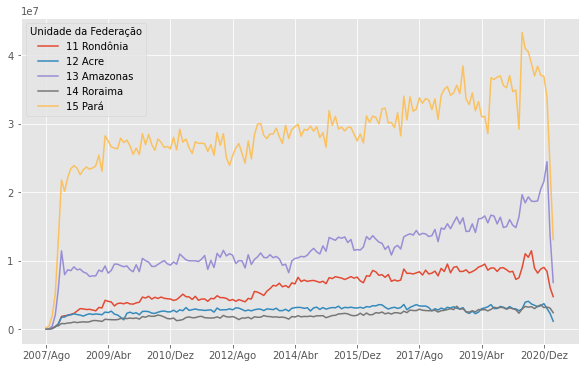

In [45]:
validas[:5].T.plot(figsize=(10,6))

Observando acima, são todos da região Norte. Observando o DataFrame verifica-se que a região Norte começa com o número 1 antes do nome do Estado. Nordeste com 2 e assim por diante

In [46]:
validas.T.columns[0:7] # Aqui verifica-se que a região Norte tem sete Estados. Vamos ajustar o gráfico para todos dessa região

Index(['11 Rondônia', '12 Acre', '13 Amazonas', '14 Roraima', '15 Pará',
       '16 Amapá', '17 Tocantins'],
      dtype='object', name='Unidade da Federação')

<AxesSubplot:>

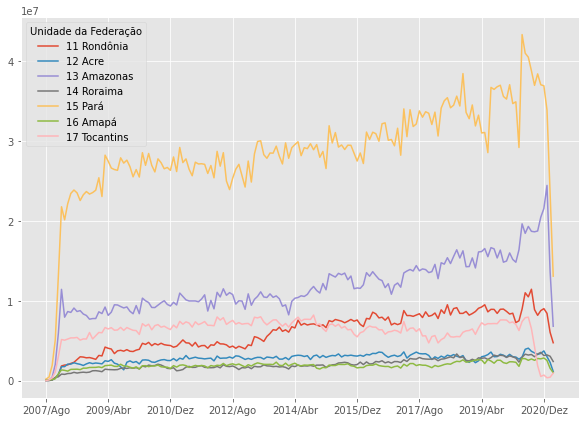

In [47]:
validas[:7].T.plot(figsize=(10,7)) # Verifica-se que por essa região já se pode ter uma visão inicial melhor

***
#### Agora amostras randomicas
Se deixar só a função 'sample' já virá aleatoriamente pelo pandas. Au importar a lib numpy e usar a função random, ocorre o mesmo, mas se determinar sempre a mesma sememte (seed) de aleatoriedade então o random se 'repetirá' pq a semente é a mesma

In [48]:
import numpy as np
np.random.seed(687942)

validas.sample(7)

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,...,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
32 Espírito Santo,57408.11,284224.80,1152115.25,2296383.23,5724199.54,16212109.41,10032886.43,12262049.08,12453466.98,11789786.09,...,31958199.08,41931102.65,36405257.36,34491126.71,34800541.67,35708727.33,40500910.57,33767261.13,25669612.63,15606368.11
31 Minas Gerais,971394.37,2861781.50,10018011.35,21730281.63,43429517.54,206208080.90,70301089.50,79119005.51,79046322.41,79268070.12,...,157276616.50,177466638.10,182176122.99,181422500.43,174585638.28,168564708.16,166376967.67,155064483.25,119877417.15,79780838.00
24 Rio Grande do Norte,134605.36,272088.08,684678.30,1695824.89,4730811.68,11763899.23,9110108.87,10126626.54,10964234.85,11032871.23,...,23027750.86,28608103.39,25721339.11,25098604.18,25257993.78,24312931.74,27277816.41,23228004.80,18186942.80,8733455.36
17 Tocantins,4113.76,76633.06,343702.61,1068685.94,3022200.87,5136474.61,5051932.07,5200151.87,5343714.73,5344487.99,...,7871556.55,7934629.02,6488927.84,4229376.60,1853045.23,509009.74,689383.43,347626.85,416534.32,928756.84
53 Distrito Federal,191951.47,769966.25,2165619.56,3813256.48,7121965.42,10561085.46,10215956.80,11627918.26,11922015.36,11900817.00,...,25045580.62,26428483.82,23875303.68,21771866.33,23087586.62,20668526.36,22552034.04,22573869.50,19004029.87,14731938.43
50 Mato Grosso do Sul,199556.12,573675.41,1069816.66,1995899.52,4277979.14,8301006.10,8279288.79,9793888.78,8997542.75,9842108.59,...,19724932.28,23639938.85,22608351.55,21519151.07,21825003.22,21418665.16,21387005.58,16027788.65,11428462.42,4035989.77
16 Amapá,33672.74,104822.98,118378.28,226661.18,844019.90,1329876.61,1275063.72,1177745.93,1396371.51,1411520.77,...,2735248.12,2536642.73,2702550.32,2533445.46,2762003.36,2714710.93,2826612.42,2513766.36,1534733.18,989155.40


In [49]:
validas.sample(7)

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,...,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
42 Santa Catarina,693955.05,1092964.12,3562300.82,7578502.38,14772555.10,53034384.67,24409572.92,27483480.50,27806641.44,28354279.52,...,63114103.11,79459229.80,75061205.12,67838476.77,70993555.10,79448753.69,72720675.11,57281832.19,47429335.91,19375822.56
33 Rio de Janeiro,469469.34,921646.57,2994664.57,7250528.08,13627123.27,251511992.03,44128159.73,42900847.02,45306499.53,43951349.46,...,88135690.57,95941141.03,89795469.41,81886688.22,80570244.20,82807309.85,90567351.87,87201907.99,60873103.08,49149884.48
31 Minas Gerais,971394.37,2861781.50,10018011.35,21730281.63,43429517.54,206208080.90,70301089.50,79119005.51,79046322.41,79268070.12,...,157276616.50,177466638.10,182176122.99,181422500.43,174585638.28,168564708.16,166376967.67,155064483.25,119877417.15,79780838.00
35 São Paulo,1665349.90,4434168.64,14577395.84,35032259.98,76668547.41,1038067423.15,172961999.58,170556696.16,170338163.23,172462057.87,...,328293581.02,361986896.25,350268671.25,338872478.49,328055822.63,324599773.40,326846228.95,324115425.70,268193064.06,177408317.71
21 Maranhão,385330.18,1018352.93,2277717.78,4334468.23,8832514.85,21551600.33,13452263.93,14750895.33,15148647.11,14543679.92,...,35894441.09,33991348.70,32711259.43,31985709.32,34430463.50,32446802.41,30927070.93,26797697.76,23260245.95,17294509.11
52 Goiás,179395.82,418053.58,1198730.25,2712117.54,9293914.78,75039013.46,18149374.27,20992213.03,21049477.30,19162546.79,...,38888207.13,45871329.20,47568155.41,47951326.80,45304843.74,39785408.90,37614253.55,35655886.73,32253788.65,24867001.02
32 Espírito Santo,57408.11,284224.80,1152115.25,2296383.23,5724199.54,16212109.41,10032886.43,12262049.08,12453466.98,11789786.09,...,31958199.08,41931102.65,36405257.36,34491126.71,34800541.67,35708727.33,40500910.57,33767261.13,25669612.63,15606368.11


***
ideia de como funciona aleatoriedade por Guilherme Alura

pseudo randomness

seed = 6987
random = seed / 10, seed = seed * 2 /3


random ===> 698...... (seed=4658)
random ==> 465 (seed = 310)
random ==> 31

***
***
### Desafio 02 - Aula3: Adicionar uma coluna mostrando a região (Norte, Nodeste, Sul, Suldeste e Centro-Oeste) de cada estado.

In [50]:
validas.head() # Aqui não tem na última coluna as regiões

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,...,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,...,10993332.84,10479989.36,11433467.56,8876900.39,8167253.19,8759013.71,9003402.23,8414690.60,6039419.59,4732441.04
12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,...,3914823.86,4053085.41,3658265.59,3470409.45,3267918.69,3393958.27,3711660.71,3005561.16,2272733.90,1137341.65
13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,...,18433057.47,19303743.16,18687233.58,18628627.49,18728251.20,20451573.77,21546059.48,24439059.57,13679358.06,6799060.80
14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,...,3300012.98,3192075.41,3262354.34,2978629.22,3313296.78,3527263.23,3125021.90,3209323.68,3044798.77,2381844.31
15 Pará,181159.29,433414.74,1893197.50,5105406.44,13162823.43,21762104.16,20126081.01,22149375.82,23436682.75,23861080.80,...,40994545.21,40496349.97,38793393.54,36965951.76,38406616.21,37043032.10,36914437.92,33887773.65,23343222.94,13069564.31


In [51]:
validas.index

Index(['11 Rondônia', '12 Acre', '13 Amazonas', '14 Roraima', '15 Pará',
       '16 Amapá', '17 Tocantins', '21 Maranhão', '22 Piauí', '23 Ceará',
       '24 Rio Grande do Norte', '25 Paraíba', '26 Pernambuco', '27 Alagoas',
       '28 Sergipe', '29 Bahia', '31 Minas Gerais', '32 Espírito Santo',
       '33 Rio de Janeiro', '35 São Paulo', '41 Paraná', '42 Santa Catarina',
       '43 Rio Grande do Sul', '50 Mato Grosso do Sul', '51 Mato Grosso',
       '52 Goiás', '53 Distrito Federal'],
      dtype='object', name='Unidade da Federação')

In [52]:
validas.T.columns

Index(['11 Rondônia', '12 Acre', '13 Amazonas', '14 Roraima', '15 Pará',
       '16 Amapá', '17 Tocantins', '21 Maranhão', '22 Piauí', '23 Ceará',
       '24 Rio Grande do Norte', '25 Paraíba', '26 Pernambuco', '27 Alagoas',
       '28 Sergipe', '29 Bahia', '31 Minas Gerais', '32 Espírito Santo',
       '33 Rio de Janeiro', '35 São Paulo', '41 Paraná', '42 Santa Catarina',
       '43 Rio Grande do Sul', '50 Mato Grosso do Sul', '51 Mato Grosso',
       '52 Goiás', '53 Distrito Federal'],
      dtype='object', name='Unidade da Federação')

***
Abaixo cria-se uma lista com o nome das Regiões em cada UF, identificando-se pelo index onde na posição 0 o caractere '1' é Norte, o '2' é nordeste, etc...

In [53]:
regiao = validas.T.columns

lst_regioes = []

for pos,char in enumerate(regiao):
    if(char[0] == '1'):
        lst_regioes.append('Norte')
    elif(char[0] == '2'):
        lst_regioes.append('Nordeste')
    elif(char[0] == '3'):
        lst_regioes.append('Sudeste')
    elif(char[0] == '4'):
        lst_regioes.append('Sul')
    elif(char[0] == '5'):
        lst_regioes.append('Centro Oeste')
        
print(lst_regioes)

['Norte', 'Norte', 'Norte', 'Norte', 'Norte', 'Norte', 'Norte', 'Nordeste', 'Nordeste', 'Nordeste', 'Nordeste', 'Nordeste', 'Nordeste', 'Nordeste', 'Nordeste', 'Nordeste', 'Sudeste', 'Sudeste', 'Sudeste', 'Sudeste', 'Sul', 'Sul', 'Sul', 'Centro Oeste', 'Centro Oeste', 'Centro Oeste', 'Centro Oeste']


***
Aqui, acrescentou-se a coluna 'Regiões' contendo a LISTA lst_regioes no DataFrame 'validas'

In [54]:
import pandas as pd
validas['Regiões'] = lst_regioes
validas.head()

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,...,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Regiões
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,...,10479989.36,11433467.56,8876900.39,8167253.19,8759013.71,9003402.23,8414690.60,6039419.59,4732441.04,Norte
12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,...,4053085.41,3658265.59,3470409.45,3267918.69,3393958.27,3711660.71,3005561.16,2272733.90,1137341.65,Norte
13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,...,19303743.16,18687233.58,18628627.49,18728251.20,20451573.77,21546059.48,24439059.57,13679358.06,6799060.80,Norte
14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,...,3192075.41,3262354.34,2978629.22,3313296.78,3527263.23,3125021.90,3209323.68,3044798.77,2381844.31,Norte
15 Pará,181159.29,433414.74,1893197.50,5105406.44,13162823.43,21762104.16,20126081.01,22149375.82,23436682.75,23861080.80,...,40496349.97,38793393.54,36965951.76,38406616.21,37043032.10,36914437.92,33887773.65,23343222.94,13069564.31,Norte


***
***

***
### Continuidade Aula 3 mod1 

Mas antes vamos retirar a coluna 'Regiões'

In [55]:
validas = validas.drop('Regiões', axis=1)
validas.head()

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,...,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,...,10993332.84,10479989.36,11433467.56,8876900.39,8167253.19,8759013.71,9003402.23,8414690.60,6039419.59,4732441.04
12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,...,3914823.86,4053085.41,3658265.59,3470409.45,3267918.69,3393958.27,3711660.71,3005561.16,2272733.90,1137341.65
13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,...,18433057.47,19303743.16,18687233.58,18628627.49,18728251.20,20451573.77,21546059.48,24439059.57,13679358.06,6799060.80
14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,...,3300012.98,3192075.41,3262354.34,2978629.22,3313296.78,3527263.23,3125021.90,3209323.68,3044798.77,2381844.31
15 Pará,181159.29,433414.74,1893197.50,5105406.44,13162823.43,21762104.16,20126081.01,22149375.82,23436682.75,23861080.80,...,40994545.21,40496349.97,38793393.54,36965951.76,38406616.21,37043032.10,36914437.92,33887773.65,23343222.94,13069564.31


#### Agora acrescentar uma coluna total na tabela

In [56]:
validas.sum() # Aqui, sem especificação, ele soma o valor das colunas

2007/Ago      8233724.90
2007/Set     21279921.98
2007/Out     65884400.02
2007/Nov    148968559.33
2007/Dez    333103304.40
                ...     
2020/Nov   1450857674.98
2020/Dez   1451868546.56
2021/Jan   1335800905.13
2021/Fev   1052795454.22
2021/Mar    652420247.87
Length: 164, dtype: float64

In [57]:
validas.sum(axis=1) # aqui especificou-se que a soma se dará no eixo x - das linhas

Unidade da Federação
11 Rondônia                996410650.35
12 Acre                    450047246.65
13 Amazonas               1917245104.64
14 Roraima                 328876551.40
15 Pará                   4705290466.69
16 Amapá                   309837994.87
17 Tocantins              1019990254.88
21 Maranhão               3871010362.58
22 Piauí                  2280874839.37
23 Ceará                  6591825335.83
24 Rio Grande do Norte    2660065804.91
25 Paraíba                2614895825.09
26 Pernambuco             8580915668.43
27 Alagoas                2236401471.26
28 Sergipe                1215843416.10
29 Bahia                  9791496136.10
31 Minas Gerais          20418205467.78
32 Espírito Santo         3405838975.80
33 Rio de Janeiro        10337229379.18
35 São Paulo             41386533231.31
41 Paraná                14681341476.16
42 Santa Catarina         7834872054.38
43 Rio Grande do Sul     12764274442.95
50 Mato Grosso do Sul     2324515373.43
51 Mato Grosso     

In [58]:
validas['Total'] = validas.sum(axis=1)  ### Aqui atribuiu-se a uma nova coluna 'Total' ao DF especificando os valores dela sendo a soma das linhas . O Total aparece no final a direita. A atribuição por soma funcionou pq tem 27 valores, igual as linhas do data frame e é a soma de cada linha. Se tem alguma linha faltando, não funcionaria.
validas.head()

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,...,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,...,10479989.36,11433467.56,8876900.39,8167253.19,8759013.71,9003402.23,8414690.60,6039419.59,4732441.04,996410650.35
12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,...,4053085.41,3658265.59,3470409.45,3267918.69,3393958.27,3711660.71,3005561.16,2272733.90,1137341.65,450047246.65
13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,...,19303743.16,18687233.58,18628627.49,18728251.20,20451573.77,21546059.48,24439059.57,13679358.06,6799060.80,1917245104.64
14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,...,3192075.41,3262354.34,2978629.22,3313296.78,3527263.23,3125021.90,3209323.68,3044798.77,2381844.31,328876551.40
15 Pará,181159.29,433414.74,1893197.50,5105406.44,13162823.43,21762104.16,20126081.01,22149375.82,23436682.75,23861080.80,...,40496349.97,38793393.54,36965951.76,38406616.21,37043032.10,36914437.92,33887773.65,23343222.94,13069564.31,4705290466.69


***
#### Agora o objetivo é um gráfico com os 5 Estados com maior valor total
Para isso, e com a coluna Total readicionada, vamos classificar (ordenar) o DataFrame

In [59]:
validas.sort_values('Total', ascending=False) # Em ordem de maior para o menor gasto (se ascending True ou ausente por default então é do menor para o maior)

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,...,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
35 São Paulo,1665349.90,4434168.64,14577395.84,35032259.98,76668547.41,1038067423.15,172961999.58,170556696.16,170338163.23,172462057.87,...,361986896.25,350268671.25,338872478.49,328055822.63,324599773.40,326846228.95,324115425.70,268193064.06,177408317.71,41386533231.31
31 Minas Gerais,971394.37,2861781.50,10018011.35,21730281.63,43429517.54,206208080.90,70301089.50,79119005.51,79046322.41,79268070.12,...,177466638.10,182176122.99,181422500.43,174585638.28,168564708.16,166376967.67,155064483.25,119877417.15,79780838.00,20418205467.78
41 Paraná,554800.22,1431708.01,4630402.44,11120030.79,28790722.87,58081334.45,48855046.46,55611791.07,56115135.82,55574831.93,...,123856640.55,125089468.62,121771167.11,127506086.52,133443307.36,122146256.92,106948897.53,83130175.37,43480729.07,14681341476.16
43 Rio Grande do Sul,1049252.33,3182913.14,8571312.11,16592432.80,30134255.70,51064610.03,45897704.82,52928695.92,51972416.77,51679350.79,...,108536525.93,111762290.19,110107867.30,113886837.47,116738266.69,116833971.73,102317646.36,84404640.00,37798832.80,12764274442.95
33 Rio de Janeiro,469469.34,921646.57,2994664.57,7250528.08,13627123.27,251511992.03,44128159.73,42900847.02,45306499.53,43951349.46,...,95941141.03,89795469.41,81886688.22,80570244.20,82807309.85,90567351.87,87201907.99,60873103.08,49149884.48,10337229379.18
29 Bahia,135146.36,448349.75,1382038.11,3348779.62,11948984.56,73947845.87,33410124.06,41316672.72,42826993.62,42086263.49,...,91011171.04,86230665.84,78135509.62,82912397.81,81866088.87,83131785.74,70325599.07,55544579.04,31314602.44,9791496136.10
26 Pernambuco,400640.85,1088340.42,2973553.48,6699828.82,16919031.39,51261210.58,26222079.10,30716361.81,30589332.79,31420089.90,...,73730927.63,76091056.19,73964434.93,72356982.69,71810830.78,77877186.72,76810042.34,62259409.32,39472738.81,8580915668.43
42 Santa Catarina,693955.05,1092964.12,3562300.82,7578502.38,14772555.10,53034384.67,24409572.92,27483480.50,27806641.44,28354279.52,...,79459229.80,75061205.12,67838476.77,70993555.10,79448753.69,72720675.11,57281832.19,47429335.91,19375822.56,7834872054.38
23 Ceará,357904.65,572356.18,1865065.71,5131814.39,10798042.86,32444328.54,27643304.86,30085370.22,31376221.00,31189904.62,...,58448488.85,55118185.83,53827491.88,54679652.99,54026288.42,50271552.33,43743425.74,30186951.00,17173151.55,6591825335.83


Para manter um dataframe ordenando mas sem a coluna Total:

In [60]:
ordenado_por_total = validas.sort_values('Total', ascending=False) 
ordenado_por_total = ordenado_por_total.drop('Total', axis=1)
ordenado_por_total.head()

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,...,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
35 São Paulo,1665349.90,4434168.64,14577395.84,35032259.98,76668547.41,1038067423.15,172961999.58,170556696.16,170338163.23,172462057.87,...,328293581.02,361986896.25,350268671.25,338872478.49,328055822.63,324599773.40,326846228.95,324115425.70,268193064.06,177408317.71
31 Minas Gerais,971394.37,2861781.50,10018011.35,21730281.63,43429517.54,206208080.90,70301089.50,79119005.51,79046322.41,79268070.12,...,157276616.50,177466638.10,182176122.99,181422500.43,174585638.28,168564708.16,166376967.67,155064483.25,119877417.15,79780838.00
41 Paraná,554800.22,1431708.01,4630402.44,11120030.79,28790722.87,58081334.45,48855046.46,55611791.07,56115135.82,55574831.93,...,115203716.64,123856640.55,125089468.62,121771167.11,127506086.52,133443307.36,122146256.92,106948897.53,83130175.37,43480729.07
43 Rio Grande do Sul,1049252.33,3182913.14,8571312.11,16592432.80,30134255.70,51064610.03,45897704.82,52928695.92,51972416.77,51679350.79,...,96799361.58,108536525.93,111762290.19,110107867.30,113886837.47,116738266.69,116833971.73,102317646.36,84404640.00,37798832.80
33 Rio de Janeiro,469469.34,921646.57,2994664.57,7250528.08,13627123.27,251511992.03,44128159.73,42900847.02,45306499.53,43951349.46,...,88135690.57,95941141.03,89795469.41,81886688.22,80570244.20,82807309.85,90567351.87,87201907.99,60873103.08,49149884.48


Gráfico com os 5 Estados com maiores gastos

<AxesSubplot:>

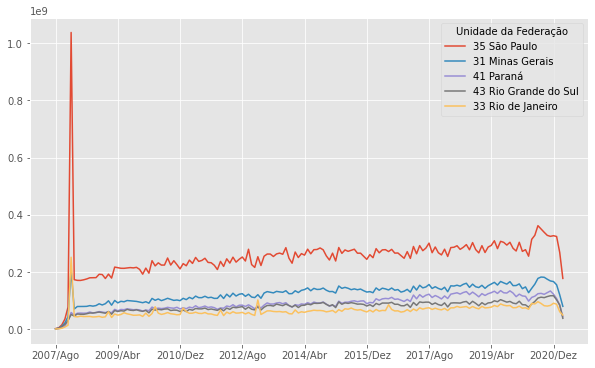

In [61]:
ordenado_por_total.head().T.plot(figsize=(10,6))

***
***
### Desafio 03 - Aula3: Formatar o gráfico de custos por mês dos 5 estados, deixando ele agradável (Bonitão, segundo o Gui)
Abaixo uma Função criada por --> @Mumaral para aumentar o número de xticks de String no gráfico

In [62]:
def choose_number_of_str_ticks(approximated_number_of_ticks, df, axis='x'):    # Função criada por @mumaral
    # tick labels must be strings for this function to work properly / # df must be a pandas DataFrame
    pandas_index = df.columns if axis == 'y' else df.index    # indexing df by columns (if axis ='y') or rows (default)
    pandas_index_length = pandas_index.size
    divisor = pandas_index_length // approximated_number_of_ticks    # getting only the integer part with floor division (//)
    ticks = [ item for item in range(pandas_index_length) if item % divisor == 0 ]    # creating list with ticks positions
    labels = [ pandas_index[position] for position in ticks ]    # getting the labels of 'ticks' list items
    return ticks, labels

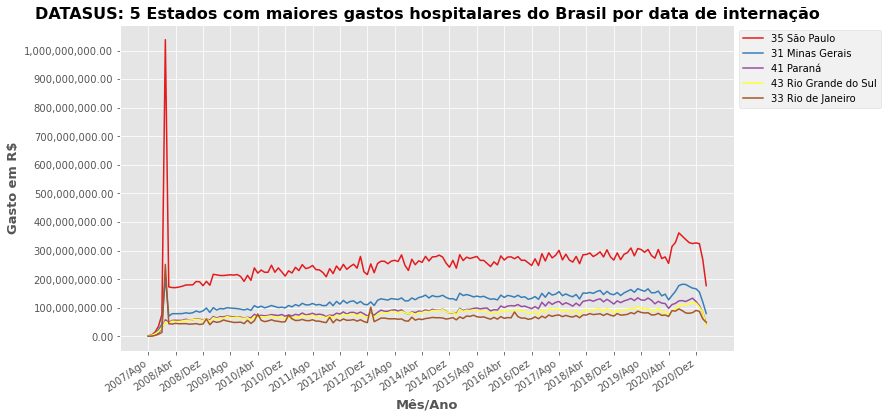

In [63]:
import matplotlib.cm as cm
cores = len(validas)
tipo_cores = plt.cm.Set1(np.linspace(0, 5, cores))
ax = ordenado_por_total.head().T.plot(figsize=(11,6), color=tipo_cores)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
ax.set_xlabel('Mês/Ano', fontsize=13, weight=(700))
ax.set_ylabel('Gasto em R$', fontsize=13, weight=(700))
plt.style.use('bmh') 
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.xticks(rotation=35, ha='right')
plt.locator_params(axis='y', nbins=12)
ticks, labels = choose_number_of_str_ticks(20, df=ordenado_por_total.T, axis='x')
ax.set_xticks(ticks)
ax.set_xticklabels(labels)
plt.title('DATASUS: 5 Estados com maiores gastos hospitalares do Brasil por data de internação', weight=(700), fontsize=16)
plt.show()

***
***
### Desafio 04: Adicione o seu estado aos 5 estados plotados anteriormente
(retirar a distorção da escala em virtude do valor anomalo entre ago/2007 e abr/2008)

##### No dataframe ordenado_por_total, chamado acima, notou-se que a coluna Jan/2008 está com valores distorcidos (possível começo do DF pelo SUS)
Será retirado do dataframe essa coluna Jan/2008 que está na posição 5 e todas antes dessa

In [64]:
colunas_interessadas = ordenado_por_total.columns[6:]
ordenado_por_total = ordenado_por_total[colunas_interessadas]

In [65]:
ordenado_por_total.head()

,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,...,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
35 São Paulo,172961999.58,170556696.16,170338163.23,172462057.87,175492995.85,179569910.06,180005050.15,180151656.17,191859884.40,190927266.19,...,328293581.02,361986896.25,350268671.25,338872478.49,328055822.63,324599773.40,326846228.95,324115425.70,268193064.06,177408317.71
31 Minas Gerais,70301089.50,79119005.51,79046322.41,79268070.12,79619189.20,82209206.98,80374117.08,82409129.30,88613476.60,84486996.11,...,157276616.50,177466638.10,182176122.99,181422500.43,174585638.28,168564708.16,166376967.67,155064483.25,119877417.15,79780838.00
41 Paraná,48855046.46,55611791.07,56115135.82,55574831.93,56094754.74,59802402.07,56699001.13,58091985.79,61365941.22,59667208.62,...,115203716.64,123856640.55,125089468.62,121771167.11,127506086.52,133443307.36,122146256.92,106948897.53,83130175.37,43480729.07
43 Rio Grande do Sul,45897704.82,52928695.92,51972416.77,51679350.79,53759674.01,56391647.77,56233758.74,57910170.98,59592124.91,57565742.08,...,96799361.58,108536525.93,111762290.19,110107867.30,113886837.47,116738266.69,116833971.73,102317646.36,84404640.00,37798832.80
33 Rio de Janeiro,44128159.73,42900847.02,45306499.53,43951349.46,44111107.27,44359056.71,42500830.29,43066461.47,44553314.55,41351511.51,...,88135690.57,95941141.03,89795469.41,81886688.22,80570244.20,82807309.85,90567351.87,87201907.99,60873103.08,49149884.48


##### Agora concatenando os 5 estados + o Pará e a Bahia

In [66]:
ordenado_total_head_mais1 = pd.concat([ordenado_por_total.head(), ordenado_por_total.loc[['15 Pará', '29 Bahia']]]) # Concatenando novo dataframe: 5 estados + o Pará

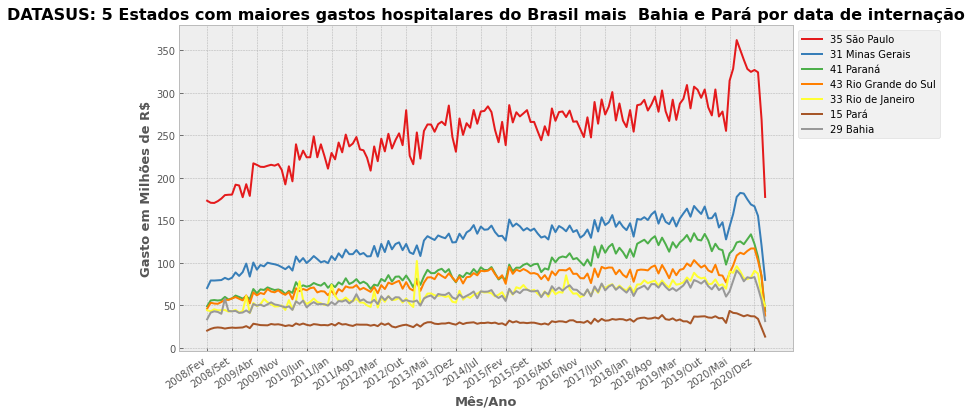

In [67]:
import matplotlib.cm as cm
cores = len(validas)
tipo_cores = plt.cm.Set1(np.linspace(0, 4, cores))
ordenado_total_head_mais1 = ordenado_total_head_mais1 / 1000000
ax = ordenado_total_head_mais1.T.plot(figsize=(11,6), color=tipo_cores)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
ax.set_xlabel('Mês/Ano', fontsize=13, weight=(700))
ax.set_ylabel('Gasto em Milhões de R$', fontsize=13, weight=(700))
plt.style.use('bmh') 
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.xticks(rotation=35, ha='right')
plt.locator_params(axis='y', nbins=12)
ticks, labels = choose_number_of_str_ticks(20, df=ordenado_por_total.T, axis='x')
ax.set_xticks(ticks)
ax.set_xticklabels(labels)
plt.title('DATASUS: 5 Estados com maiores gastos hospitalares do Brasil mais  Bahia e Pará por data de internação', weight=(700), fontsize=16)
plt.show()

***
***
#### Desafio 05 Aula 3 Mod1: Buscar os casos de dengue no Brasil (época de maior número de casos e regiões mais atingidas) e se os picos de alguns estados em fevereiro e verão de modo geral, pode ser reflexos dos casos de dengue

#### Sobre a Base de Dados utilizada e sua viabilidade de análise de gastos e casos de dengue

- Para essa avaliação, precisa-se compreender melhor a origem dos dados do dataframe atual e o que pode formar os seus valores.
A base de dados é do SUS, como vimos, e o sistema TabNet possui [Documentação](http://tabnet.datasus.gov.br/cgi/sih/Proced_hosp_loc_int_2008.pdf) que informa que os dados vem da rede pública ou privada, federal, estadual ou municipal. Ainda, que a base do datasus contem a <i>"identificação do paciente, procedimentos, exames e atos médicos realizados, diagnóstico, 
motivo da alta, valores devidos etc."</i>. Complementando que os atendimentos são: eletivos, de urgência, tipos diversos de acidentes de deslocamento, e  lesões e envenenamentos por agentes químicos ou físicos. Assim, fica evidente que **dentre os gastos hospitalares há uma miríade de motivos e não apenas atendimentos sobre dengue**.  

- Fica claro, portanto, que para avaliar inicialmente a relação de casos de dengues com eventual aumento de gastos no verão ou fevereiro pode-se proceder, a depender da profundidade de análise desejada, de algumas das seguintes formas, dentre outras:
    - a) Apenas com análise da prevalencia sazonal dos casos de dengue de maneira estrita. Supondo que os valores gastos em hospitais aumentam a partir de uma base proporcional. A informação da temporalidade dos casos pode ser encontrada em busca simples de notícias e informes na internet. A vantagem é a comparação direta e a desvantagem é a ausencia de informação do custo por atendimento de pacientes eletivos com dengue.
    - b) Buscar com profundidade a ocorrencia mensal de casos e os valores médio de atendimento/internação por dengue e também pelas outras doenças e casos de traumas, lesões e envenenamentos por outros motivos citados acima. Essa busca pode ser feita no TabNet específico no próprio DataSus com algumas limitações. A vantagem é que poderia ser possível identificar o impacto da sazonalidade de verão ou temporalidade mensal nos gastos hospitalares e comparar com outros motivos de atendimento.

Aqui por se tratar de desafio em treinamento do bootcamp em DataScience da Alura, será feita breve avaliação da foram **a)** acima. De outro modo essa investigação já seria em si um projeto a parte.

**- Sobre a distribuição sazonal de casos**

A partir do [Boletim Epidemiológico 51](https://www.gov.br/saude/pt-br/media/pdf/2020/dezembro/28/boletim_epidemiologico_svs_51.pdf) de dez/2020 do Ministério da Saúde podemos ver de forma clara as curvas de distribuição de casos de dengue concentradas no verão e estendendo-se por todo o primeiro semestre (semana epidemilógica 1 a 26) para os anos de 2019 e 2020:<br>
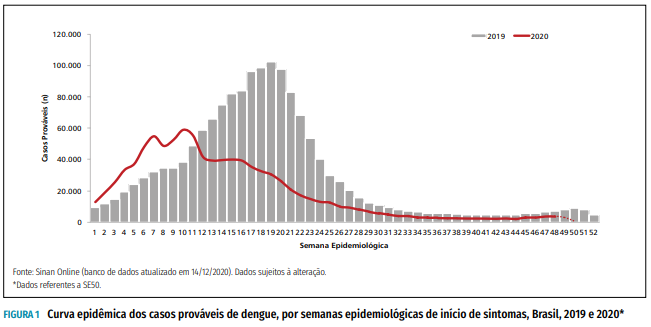<br>
O mesmo pode ser visto para os anos de 2015 a 2017 no [Boletim Epidemiologico 49](http://portalarquivos2.saude.gov.br/images/pdf/2018/janeiro/23/Boletim-2018-001-Dengue.pdf) de dez/2018 do Ministério da Saúde<br>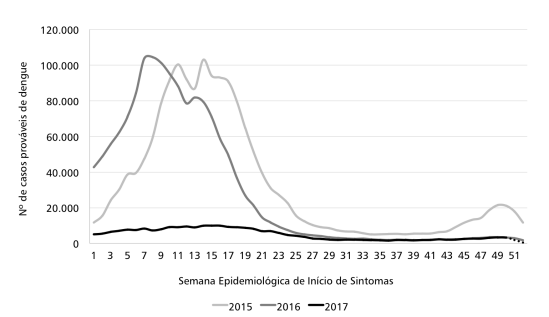<br> Também é possível verificar que o número de casos pode variar bastante de um ano para outro, no caso com 2015 bem menor que os outros anos.
Para uma amostragem mais sistemática dos casos por ano, pode ser utilizado o DataSus no link: http://tabnet.datasus.gov.br/cgi/deftohtm.exe?sinannet/cnv/denguebbr.def .<br> Um gráfico de 2014-2020 do André Jarenkow feito neste BootCamp da Alura (Linkedin: https://www.linkedin.com/in/andre-jarenkow/ ) pode ser visto [aqui](https://media.discordapp.net/attachments/840388857266044949/845009973133836348/unknown.png) <br>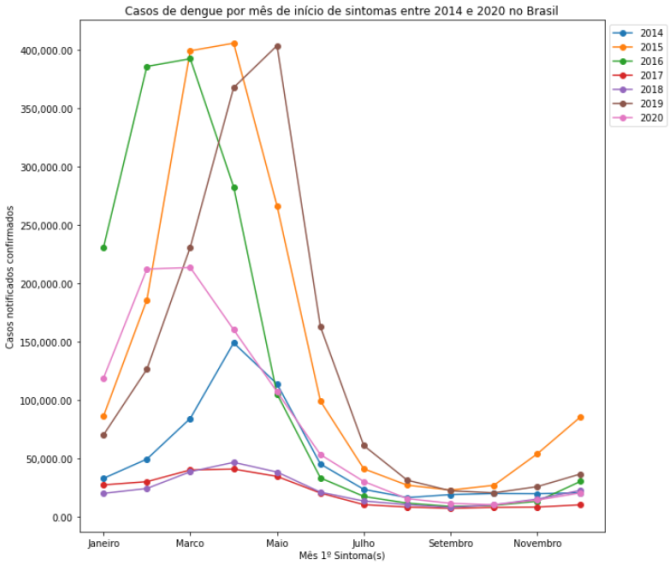

- Sobre a distribuição regional ou estadual de casos

Em ntícias ou boletins não há um comportamento único em relação a curva de casos de dengue. Isso pode variar tanto por fatores ambientais e geográficos de um ano para outro, como ocorrência maior de chuvas, como por fatores comportamentais e locais, como campanhas estaduais ou municipais de combate a focos e ainda gastos de prevenção de focos com água sanitária ou fumacês. Assim pode ser visto em links como o [Brasil de Fato](https://www.brasildefato.com.br/2020/04/16/em-meio-a-pandemia-do-coronavirus-numero-de-casos-de-dengue-no-brasil-cresce-129) a afirmação proporcional ref. a 12ª semana de 2020: <br>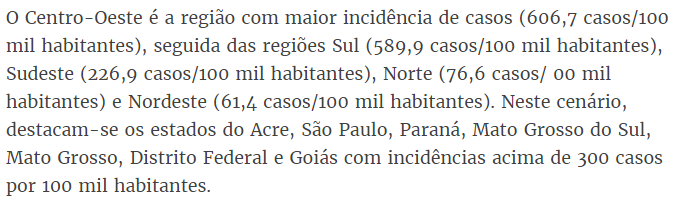<br> Por outro lado a [Veja Saúde](https://saude.abril.com.br/medicina/casos-de-dengue-aumentam-149-no-brasil-quais-os-locais-mais-afetados/) demonstra que no início de 2019 a regionalização das maiores quantidades de casos era outra<br> 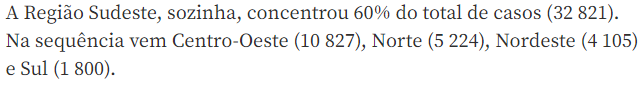<br> A [A folha de São Paulo](https://www1.folha.uol.com.br/cotidiano/2019/09/casos-de-dengue-crescem-599-em-oito-meses-e-ministerio-da-saude-lanca-nova-campanha.shtml) também reporta, com fonte do Min. da Saúde, do ano 2018 para 2019 mudanças regionais quantitativas<br>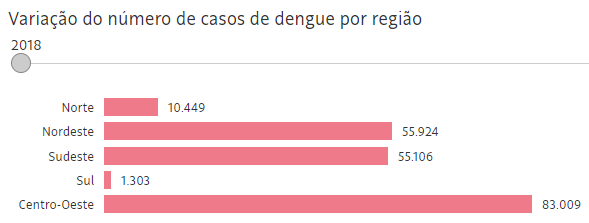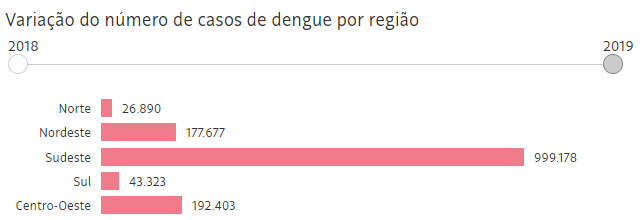<br> Pode ser observado nessa mesma notícia variação por estado por ano:<br>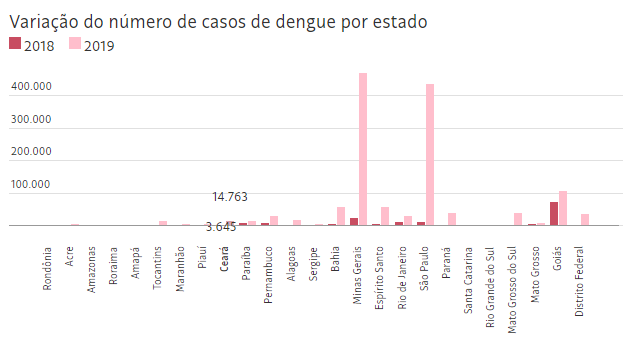 

### - Vimos assim, que:
- observa-se porporção bem maior de casos de dengue no primeiro semestre de cada ano, não apenas no verão mas indo para o outono.
- Existem variações proporcionais consideráveis gerais de um ano para outro.
- Existem grande variação em uma mesma região ou estado de um ano para outro, que deve ser dependente de fatores ambientais, comportamentais e de políticas públicas.
#### Deve-se esperar portanto um aumento de gastos hospitalares nos estados ou regiões com maior quantidade de casos de dengue no primeiro semestre de cada ano
#### Não é possível saber, todavia, o impacto desse custo no gasto hospitalar total reportado, já que não se tem o valor médio do atendimento/internação de casos de dengue comparado a todo o restante de atendimentos de outras causas realizados.

#### - Como recomendação de um projeto, pode-se investigar a prevalencia de casos de dengue em uma população com variações sazonais relacionando-se com a pluviosidade de cada local e ainda a existência de políticas de conscientização e de combate a focos do mosquito transmissor.
***

***
***
#### Desafio 06 Aula 3 Mod1: Plotar o gráfico dos custos apenas dos estados da região sudeste e verificar se os picos de 2013/Fev teve comportamento similar em todos os demais estados da região

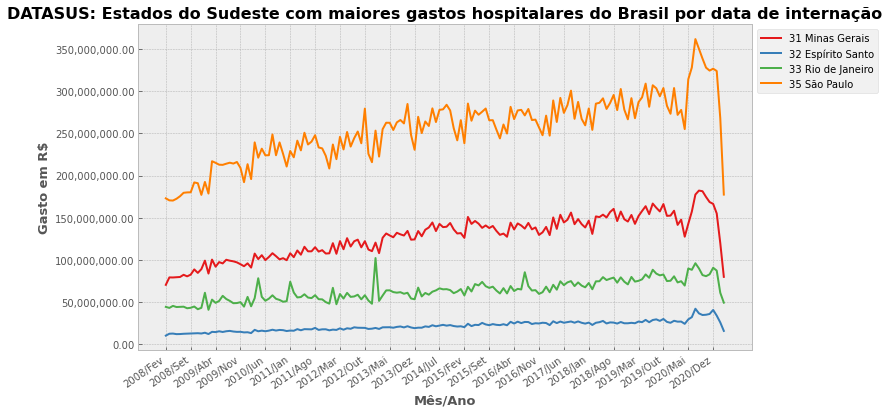

In [68]:
import matplotlib.cm as cm
cores = len(validas)
tipo_cores = plt.cm.Set1(np.linspace(0, 4, cores))
ax = ordenado_por_total.loc[['31 Minas Gerais', '32 Espírito Santo', '33 Rio de Janeiro', '35 São Paulo']].T.plot(figsize=(11,6), color=tipo_cores)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
ax.set_xlabel('Mês/Ano', fontsize=13, weight=(700))
ax.set_ylabel('Gasto em R$', fontsize=13, weight=(700))
plt.style.use('bmh') 
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.xticks(rotation=35, ha='right')
plt.locator_params(axis='y', nbins=12)
ticks, labels = choose_number_of_str_ticks(20, df=ordenado_por_total.T, axis='x')
ax.set_xticks(ticks)
ax.set_xticklabels(labels)
plt.title('DATASUS: Estados do Sudeste com maiores gastos hospitalares do Brasil por data de internação', weight=(700), fontsize=16)
plt.show()

No gráfico pode-se observar que um pico de gastos no verão 2012/2013 ocorreu apenas nos Estados de São Paulo e Rio de Janeiro, não sendo observado no Espírito Santo ou Minas Gerais. Conforme o desafio 5, podemos agora inferir que esse pico pode estar associado, em alguma proporção NÃO conhecida, a casos de dengue, que tem variação inclusive entre Estados, mas que pode ter a origem a partir de outras questões não relacionadas a dengue.

***
***
#### Desafio 07 Aula 3 Mod1: Adicionar seu estado escolhido novamente, deixe o gráfico informativo e tire conclusões sobre seus estados comparando com os demais. Tire suas conclusões e compartilhe com a gente.

In [71]:
ordenado_total_head_mais1 = pd.concat([ordenado_por_total.head(), ordenado_por_total.loc[['15 Pará', '29 Bahia']]]) # Concatenando novo dataframe: 5 estados + o Pará e a Bahia

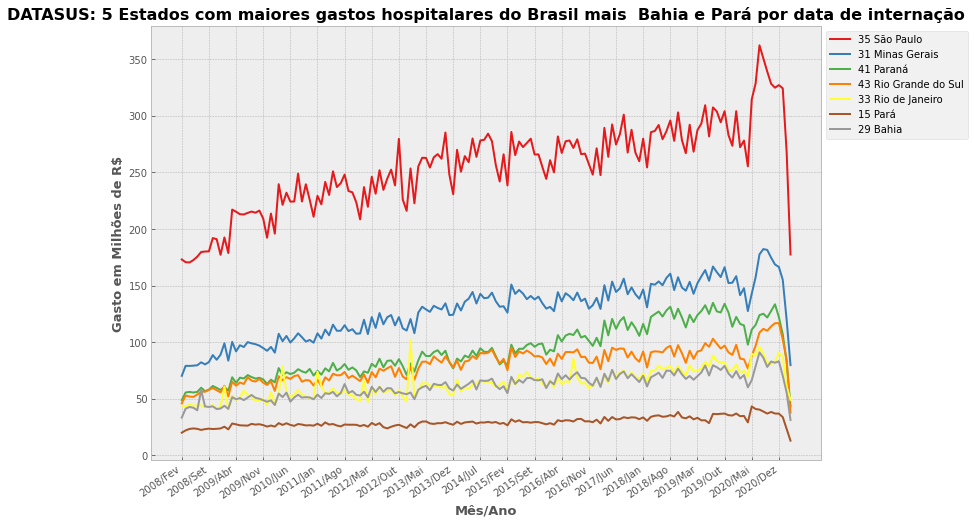

In [72]:
import matplotlib.cm as cm
cores = len(validas)
tipo_cores = plt.cm.Set1(np.linspace(0, 4, cores))
ordenado_total_head_mais1 = ordenado_total_head_mais1 / 1000000
ax = ordenado_total_head_mais1.T.plot(figsize=(12,8), color=tipo_cores)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
ax.set_xlabel('Mês/Ano', fontsize=13, weight=(700))
ax.set_ylabel('Gasto em Milhões de R$', fontsize=13, weight=(700))
plt.style.use('bmh') 
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.xticks(rotation=35, ha='right')
plt.locator_params(axis='y', nbins=12)
ticks, labels = choose_number_of_str_ticks(20, df=ordenado_por_total.T, axis='x')
ax.set_xticks(ticks)
ax.set_xticklabels(labels)
plt.title('DATASUS: 5 Estados com maiores gastos hospitalares do Brasil mais  Bahia e Pará por data de internação', weight=(700), fontsize=16)
plt.show()

- Acrescentei junto aos 5 Estados com maiores gastos, o Estado do Pará, onde nasci, e o Estado da Bahia, onde moro.
    - Podemos observar que em termos quantitativos a Bahia tem comportamento muito semelhante ao do Rio de Janeiro, com gastos bastante próximos, e o Pará aparentemente a metade dos gastos destes. As populações, conforme último censo geral do IBGE (2010) apontam cerca de 14 milhões de habitantes para a BA, 16 milhões para o RJ e 7,6 milhões para o PA, demonstrando assim aparente proporcionalidade específica de gastos hospitalares.
    - Em descompasso com a aparente proporção de gastos pela população, estão o Paraná e o Rio Grande do Sul, pois tem respectivamente 10,4 e 10,7 milhões de habitantes, menos que BA e RJ e com gastos quantitativos maiores. O mesmo aparentemente ocorre com o 2º Estado de maior gasto, Minas Gerais, onde apesar de ter a segunda maior população do Brasil, com 19,6 milhoes de habitantes apresenta cerca do dobro dos gastos de RJ e BA com apenas cerca de 20-25% menos população.
    - São Paulo com 41,3 milhões de habitantes é o maior gasto do Brasil e os gastos parecem mais porporcionais com MG, mantendo portanto aparente desporporção populacional com BA, RJ e PA
  
- Com essa análise, é recomendável um gráfico comparando com a proporção da população de cada estado
******